# Analysis: Police Patrolling/Stops and Crime Analysis in Boston

- For this analysis I have call seperate FIO database through API and relate the crime incidences and FIO program.

In [1]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from bokeh.plotting import *
from bokeh.models import HoverTool
import numpy as np

In [2]:
df=pd.read_csv("../data/ProcessedData/merged_crime_data_2012_to_2017.csv") # reading csv

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Analysis: To check FIO and Crime by Districts 

In [3]:
# finding crime incidents by Boston districts as done in analysis 2
df1= df.groupby('DISTRICT').INCIDENT_NUM.count()
df1 = df1.reset_index(inplace=False)
df1 = df1.set_index('DISTRICT',inplace=False)
df1 = df1.ix[(['A1','A15','A7','B2','B3','C11','C6','D14','D4','E13','E18','E5']),:]
df1 = df1.reset_index(inplace=False)

In [4]:
df1.to_csv('../analysis/analysis3/CrimeIncidents_byBostonDistricts.csv', index=False) #export to csv

In [5]:
df_Cri=df[df['YEAR'].isin([2015])]
df_Cri['DATE']=df_Cri.OCCURRED_ON_DATE.apply(lambda x: x.split('T')[0])

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [6]:
df_Cri1=df_Cri.groupby('MONTH').INCIDENT_NUM.count()
df_Cri1=df_Cri1.reset_index(inplace=False)

In [7]:
df_Cri1.to_csv('../analysis/analysis3/CrimeIncidents_byMonths.csv', index=False) #export to csv

In [8]:
df_FIO=pd.read_csv("../data/ProcessedData/BostonPoliceDepartmentFIO_2014_to_2017.csv")

In [9]:
df2= df_FIO.groupby('dist').seq_num.count()
df2 = df2.reset_index(inplace=False)
df2.columns=['DISTRICT','FIO_NUM']
df2 = df2.set_index('DISTRICT',inplace=False)
df2 = df2.ix[(['A1','A15','A7','B2','B3','C11','C6','D14','D4','E13','E18','E5']),:]
df2 = df2.reset_index(inplace=False)

In [10]:
df2.to_csv('../analysis/analysis3/FIO_NUM_byBostonDistricts.csv', index=False) #export to csv

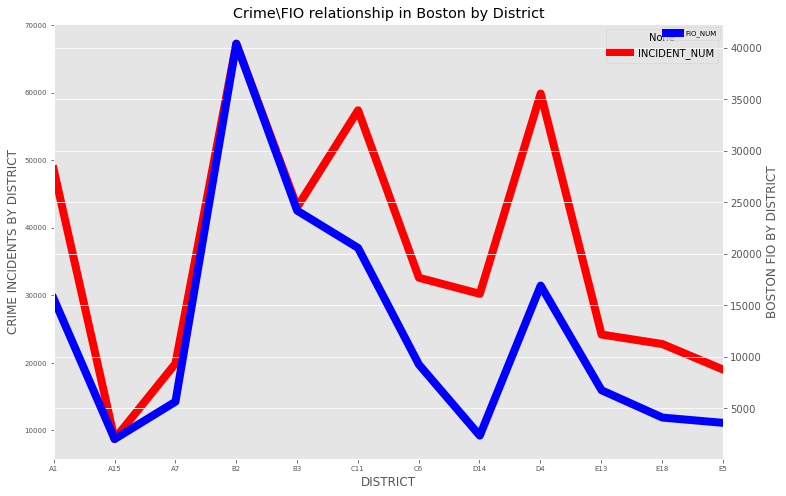

In [11]:
# Plot of crime and FIO pattern by district
plt.figure(figsize=(12,8))
pt1=df1["INCIDENT_NUM"].plot(kind='line',title='Crime\FIO relationship in Boston by District',fontsize=7)
pt1.set_ylabel('CRIME INCIDENTS BY DISTRICT')
pt1.set_xlabel("DISTRICT")

#to set ticks and correspoding labels
start, end = pt1.get_xlim()
pt1.set_xticks(np.arange(start, end, .999))
pt1.set_xticklabels(df1.DISTRICT)
pt1.lines[-1].set_linewidth(8)
pt1.lines[-1].set_color('red')
pt1.legend(fontsize=7)

pt2=df2["FIO_NUM"].plot(secondary_y=True,kind='line', title='Crime\FIO relationship in Boston by District',fontsize=7)
pt2.set_ylabel('BOSTON FIO BY DISTRICT')
pt2.lines[-1].set_linewidth(8)
pt2.lines[-1].set_color('blue')
pt2.legend(fontsize=7)

plt.show()

# Conclusion: If we look above chart, we can figure out the relation between FIO and Crime affected Districts: 
- Number of FIO is directly proprotional to the Crime incidents.
- FIO number in a district is more where crime is more.

# Analysis: To check FIO and Crime by months 

In [12]:
df_FIO['years']=df_FIO.fio_date.apply(lambda x: x.split('-')[0])
df_FIO['months']=df_FIO.fio_date.apply(lambda x: x.split('-')[1])
df_FIO['dates']=df_FIO.fio_date.apply(lambda x: x.split('T')[0])

In [13]:
df_FIO1=df_FIO[df_FIO.years.apply(lambda x: '2015' in x )]

In [14]:
df_FIO2=df_FIO1.groupby('months').seq_num.count()
df_FIO2=df_FIO2.reset_index(inplace=False)
df_FIO2.columns=['MONTH', 'FIO_NUM_PERMONTH']

In [15]:
df_FIO2.to_csv('../analysis/analysis3/FIO_NUM_byMonth.csv', index=False) #export to csv

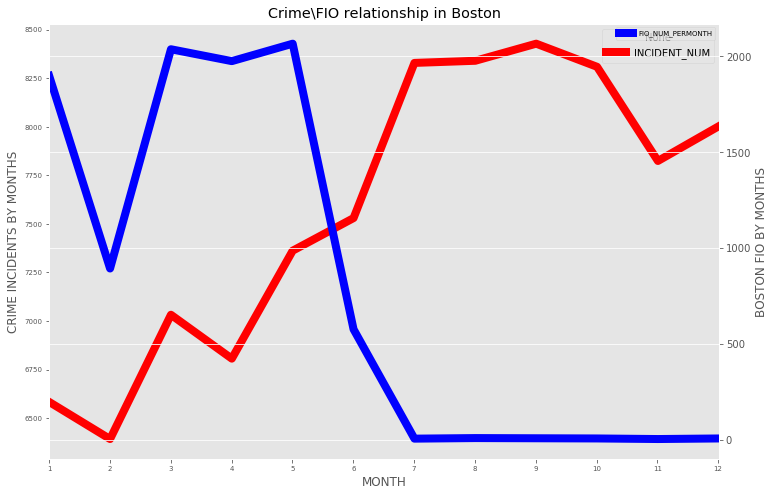

In [16]:
plt.figure(figsize=(12,8))
pt1=df_Cri1["INCIDENT_NUM"].plot(kind='line',title='Crime\FIO relationship in Boston by Month',fontsize=7)
pt1.set_ylabel('CRIME INCIDENTS BY MONTHS')
pt1.set_xlabel("MONTH")

#to set ticks and correspoding labels
start, end = pt1.get_xlim()
pt1.set_xticks(np.arange(start, end, .999))
pt1.set_xticklabels(df_Cri1.MONTH)
pt1.lines[-1].set_linewidth(8)
pt1.lines[-1].set_color('red')
pt1.legend(fontsize=7)

pt2=df_FIO2["FIO_NUM_PERMONTH"].plot(secondary_y=True,kind='line', title='Crime\FIO relationship in Boston',fontsize=7)
pt2.set_ylabel('BOSTON FIO BY MONTHS')
#pt2.set_xlabel("Month")
#pt2.set_xticklabels(df_A.MONTH)
pt2.lines[-1].set_linewidth(8)
pt2.lines[-1].set_color('blue')
pt2.legend(fontsize=7)

plt.show()

# Conclusion: If we look above chart, we can figure out the relation between FIO and Crime numbers: 
- Number of FIO is inversely proprotional to the Crime numbers.
- When FIO number is more crime is less and vice-versa.

# Analysis: To check Auto theft crime in perview of FIO in Top Four district where FIO is more for year 2015.

In [17]:
# Selecting top four district where FIO is more
df_FIO3=df_FIO1.groupby('dist').seq_num.count()
df_FIO3=df_FIO3.reset_index(inplace=False)
df_FIO3.columns=['DISTRICT', 'FIO_NUM_DISTRICT']
df_FIO3=df_FIO3.sort_values(by='FIO_NUM_DISTRICT',ascending=False)
df_FIO3=df_FIO3[df_FIO3['DISTRICT'].isin(['B2','B3','D4','C11'])]

In [18]:
df_Cri2=df_Cri[((df_Cri['DISTRICT'].isin(['B2','B3','D4','C11'])) & (df_Cri['YEAR']==2015))]

In [19]:
df_Cri3=df_Cri2.groupby('DISTRICT').INCIDENT_NUM.count()
df_Cri3=df_Cri3.reset_index(inplace=False)

In [20]:
#Filter out only Autotheft crime for analysis
df_Cri4=df_Cri2[df_Cri2['OFFENSE_DESCRIPTION'].isin(['AUTO THEFT'])].groupby('DISTRICT').INCIDENT_NUM.count()

In [21]:
df_Cri4=df_Cri4.reset_index(inplace=False)
df_Cri4.columns=['DISTRICT','AUTO_THEFT_INCIDENT_NUM']

In [22]:
dfa=pd.merge(df_Cri3,df_Cri4)
dfb=pd.merge(df_FIO3,dfa)
dfb.head()

,DISTRICT,FIO_NUM_DISTRICT,INCIDENT_NUM,AUTO_THEFT_INCIDENT_NUM
0,B2,2651,14234,191
1,B3,1546,9164,159
2,D4,1274,12339,153
3,C11,1035,12351,180


In [23]:
dfb.to_csv('../analysis/analysis3/FIO_NUM_AutoTheft_byTopFourDistricts.csv', index=False) #export to csv

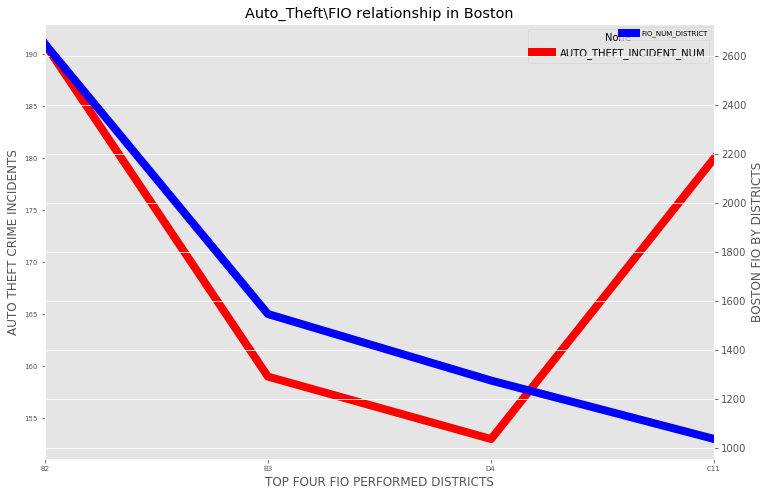

In [24]:
plt.figure(figsize=(12,8))
pt1=dfb["AUTO_THEFT_INCIDENT_NUM"].plot(kind='line',title='Auto_Theft\FIO relationship in Boston',fontsize=7)
pt1.set_ylabel('AUTO THEFT CRIME INCIDENTS')
pt1.set_xlabel("TOP FOUR FIO PERFORMED DISTRICTS")

#to set ticks and correspoding labels
start, end = pt1.get_xlim()
pt1.set_xticks(np.arange(start, end, .999))
pt1.set_xticklabels(dfb.DISTRICT)
pt1.lines[-1].set_linewidth(8)
pt1.lines[-1].set_color('red')
pt1.legend(fontsize=7)

pt2=dfb["FIO_NUM_DISTRICT"].plot(secondary_y=True,kind='line', title='Auto_Theft\FIO relationship in Boston',fontsize=7)
pt2.set_ylabel('BOSTON FIO BY DISTRICTS')
pt2.lines[-1].set_linewidth(8)
pt2.lines[-1].set_color('blue')
pt2.legend(fontsize=7)

plt.show()

# Conclusion: Autotheft crime seems low down with FIO but no strong relationship can be deduce from it.